# <center><b> <em> Data Preprocessing </em> </b></center>

## <font color="green"> | - Import Libraries and Dataframe</font>

In [939]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [940]:
# Read the XLSX file
df = pd.read_csv("data/bronze.csv",sep=";")

In [941]:
df.head(5)

,date_heure,date,heure,code_insee_region,region,consommation_brute_gaz_grtgaz,statut_grtgaz,consommation_brute_gaz_terega,statut_terega,consommation_brute_gaz_totale,consommation_brute_electricite_rte,statut_rte,consommation_brute_totale
0,2013-01-21T09:00:00+01:00,2013-01-21,09:00,11,Île-de-France,4129.0,Définitif,NaN,NaN,4129.0,13610,Définitif,17739.0
1,2013-01-21T09:00:00+01:00,2013-01-21,09:00,24,Centre-Val de Loire,4871.0,Définitif,NaN,NaN,4871.0,3589,Définitif,8460.0
2,2013-01-21T09:00:00+01:00,2013-01-21,09:00,44,Grand Est,17598.0,Définitif,NaN,NaN,17598.0,7306,Définitif,24904.0
3,2013-01-21T09:00:00+01:00,2013-01-21,09:00,76,Occitanie,2036.0,Définitif,4376.0,Définitif,6412.0,6722,Définitif,13134.0
4,2013-01-21T09:00:00+01:00,2013-01-21,09:00,84,Auvergne-Rhône-Alpes,14353.0,Définitif,94.0,Définitif,14447.0,10986,Définitif,25433.0


In [942]:
df_required = df[df['code_insee_region']==32]  [['date_heure','date','heure','consommation_brute_electricite_rte']]
df_required.head(3)

,date_heure,date,heure,consommation_brute_electricite_rte
16,2013-01-21T11:00:00+01:00,2013-01-21,11:00,8514
48,2013-01-21T19:00:00+01:00,2013-01-21,19:00,8797
53,2013-01-21T20:00:00+01:00,2013-01-21,20:00,8567


In [943]:
df_required.to_csv("data/dataset_hdf.csv")

In [944]:
data = pd.read_csv("data/hdf_dataset.csv", index_col="date_heure", parse_dates = True)


In [945]:
data.index = pd.to_datetime(data.index, utc=True)

In [946]:
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

## Details
Créée le 24 mars 2018

Modifiée le 9 mai 2023

Description du fichier

Date - Heure: date_heure[datetime]

Date: date[date]

Heure: heure[text]

Code INSEE région: code_insee_region[text]

Région: region[text]

Consommation brute gaz (MW PCS 0°C) - GRTgaz: consommation_brute_gaz_grtgaz[int] Consommation brute régionale de gaz au pas horaire en MW PCS 0°C au périmètre GRTgaz

Statut - GRTgaz: statut_grtgaz[text]

Consommation brute gaz (MW PCS 0°C) - Teréga: consommation_brute_gaz_terega[int] Consommation brute régionale de gaz au pas horaire en MW PCS 0°C au périmètre Teréga

Statut - Teréga: statut_terega[text]

Consommation brute gaz totale (MW PCS 0°C): consommation_brute_gaz_totale[int] Consommation brute régionale de gaz au pas horaire en MW PCS 0°C

Consommation brute électricité (MW) - RTE: consommation_brute_electricite_rte[int] Consommation brute régionale d’électricité au pas 30 minutes en MW

Statut - RTE: statut_rte[text]


Consommation brute totale (MW): consommation_brute_totale[int] Consommation brute régionale totale au pas horaire en MW

In [947]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183983 entries, 2013-01-21 10:00:00+00:00 to 2023-06-23 11:00:00+00:00
Data columns (total 4 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Unnamed: 0                          183983 non-null  int64 
 1   date                                183983 non-null  object
 2   heure                               183983 non-null  object
 3   consommation_brute_electricite_rte  183983 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 7.0+ MB


In [948]:
data.describe()

,Unnamed: 0,consommation_brute_electricite_rte
count,1.839830e+05,183983.000000
mean,1.103086e+06,5717.649234
std,6.376167e+05,1095.563154
min,1.600000e+01,1929.000000
25%,5.502860e+05,4877.000000
50%,1.103554e+06,5580.000000
75%,1.654736e+06,6473.000000
max,2.207789e+06,9598.000000


In [949]:
data.shape

(183983, 4)

#### <font color="green"> Remarques:</font>
#### <font color="red"> Qu'est-ce qu'une série temporelle ?</font>
Une série temporelle est une séquence d'observations enregistrées à intervalles de temps réguliers.

#### <font color="red"> Pourquoi même analyser une série temporelle ?</font>
Parce que c'est l'étape préparatoire avant de développer une prévision de la série.

De plus, la prévision des séries temporelles revêt une énorme importance commerciale, car des éléments importants pour une entreprise tels que la demande et les ventes, le nombre de visiteurs sur un site Web, le prix des actions, etc., sont essentiellement des données de séries temporelles.


#### <font color="red"> En quoi consiste l'analyse d'une série temporelle ?</font>
L'analyse d'une série temporelle consiste à étudier et à extraire des informations significatives à partir d'un ensemble de données séquentielles collectées à intervalles réguliers dans le temps. L'objectif principal de cette analyse est de comprendre les structures, les tendances, les motifs, et les phénomènes qui évoluent avec le temps, afin de prendre des décisions éclairées, de faire des prédictions, ou d'obtenir des informations utiles pour la prise de décision. 

## <font color="green"> || - Missing Data </font>

In [950]:
data.isnull().sum()

Unnamed: 0                            0
date                                  0
heure                                 0
consommation_brute_electricite_rte    0
dtype: int64

## <font color="green"> ||| - Duplicated Data </font>

In [951]:
data.duplicated().sum()

0

## <font color="green"> ||| - Questions </font>

### 1. A l’aide de pandas et matplotlib, affichez la série temporelle en utilisant comme abscisse la date 

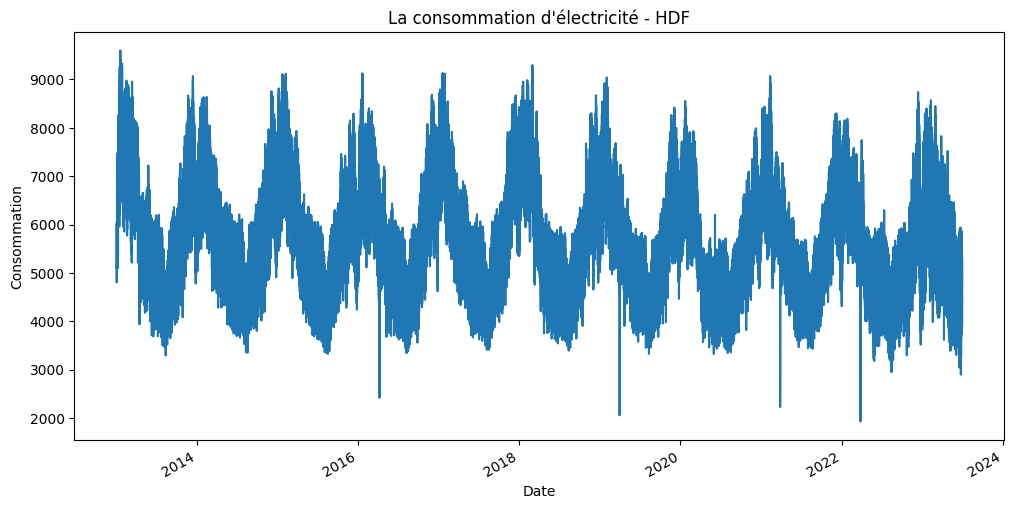

In [952]:
plt.figure(figsize=(12, 6))
data["consommation_brute_electricite_rte"].plot()
# Add a title
plt.title("La consommation d'électricité - HDF")

# Add labels for the x and y axes
plt.xlabel("Date")
plt.ylabel("Consommation")

# Display the plot
plt.show()

## 2. Affichez cette même série temporelle en rassemblant: (Par année,Par trimestre,Par mois,Par semaine,Par jour)


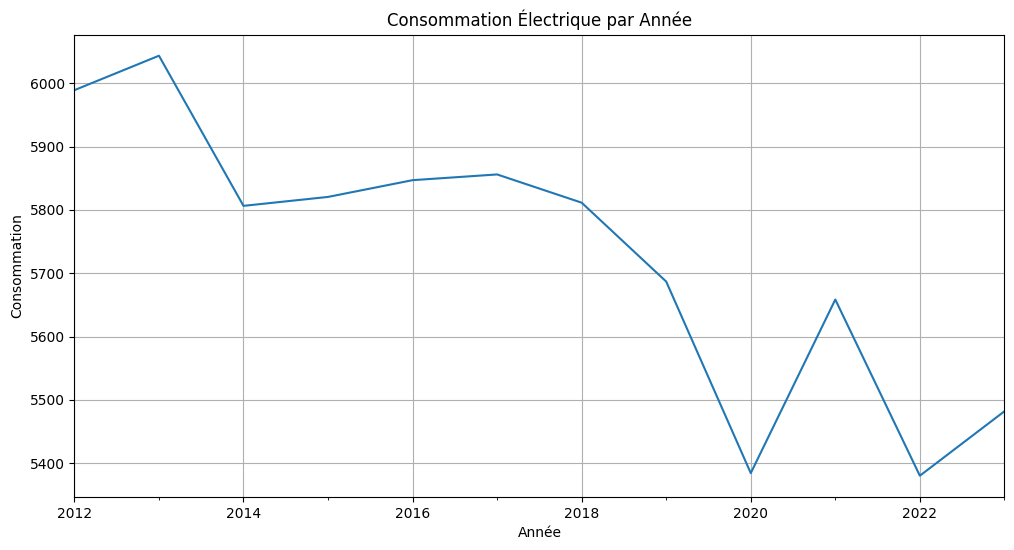

In [953]:
# Par année
plt.figure(figsize=(12, 6))
data["consommation_brute_electricite_rte"].resample("Y").mean().plot()
plt.title('Consommation Électrique par Année')
plt.xlabel('Année')
plt.ylabel('Consommation')
plt.grid(True)
plt.show()


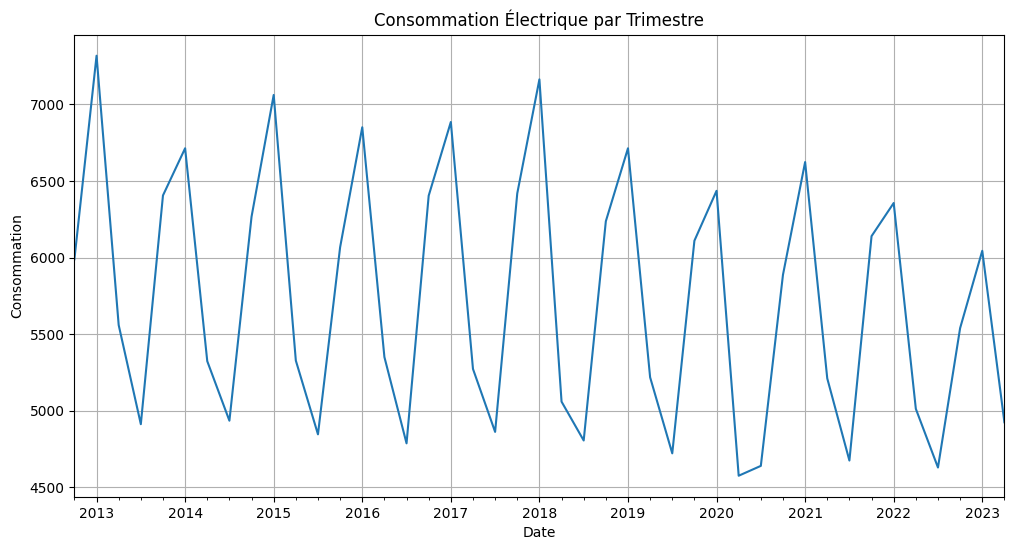

In [954]:
# Par trimestre
plt.figure(figsize=(12, 6))
data["consommation_brute_electricite_rte"].resample("Q").mean().plot()
plt.title('Consommation Électrique par Trimestre')
plt.xlabel('Date')
plt.ylabel('Consommation')
plt.grid(True)
plt.show()

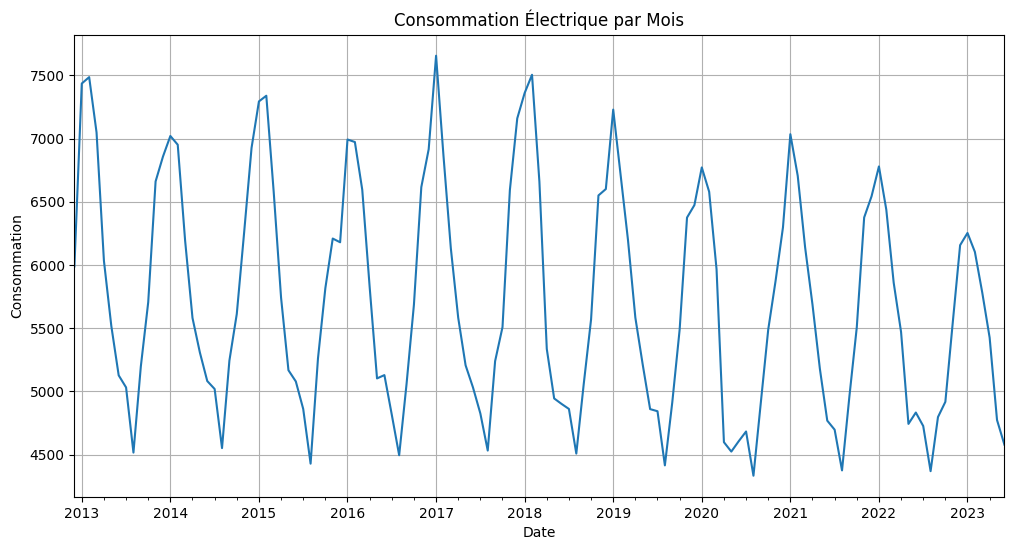

In [955]:
# Par mois
plt.figure(figsize=(12, 6))
data["consommation_brute_electricite_rte"].resample("M").mean().plot()
plt.title('Consommation Électrique par Mois')
plt.xlabel('Date')
plt.ylabel('Consommation')
plt.grid(True)
plt.show()

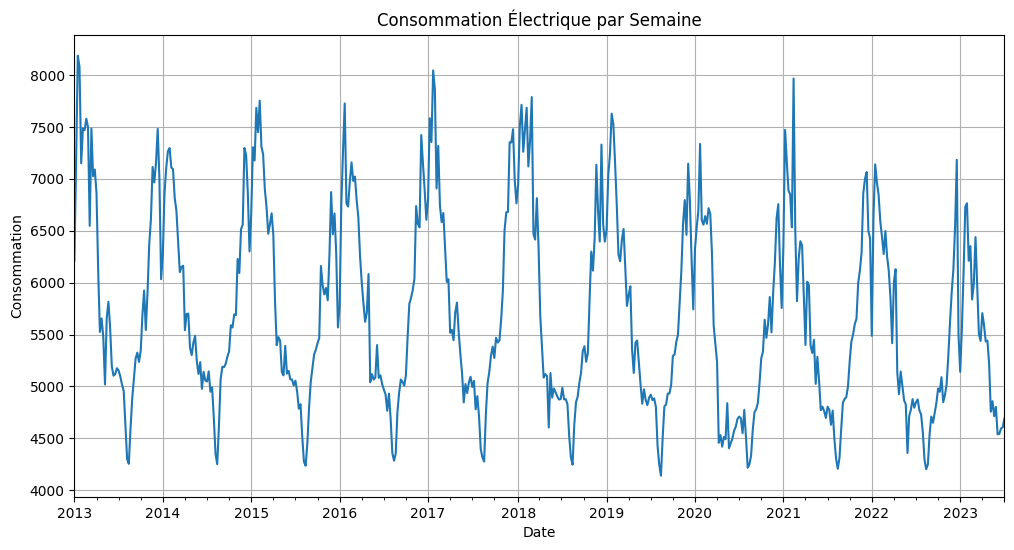

In [956]:
#Par semaine
plt.figure(figsize=(12, 6))
data.resample('W')['consommation_brute_electricite_rte'].mean().plot()
plt.title('Consommation Électrique par Semaine')
plt.xlabel('Date')
plt.ylabel('Consommation')
plt.grid(True)
plt.show()

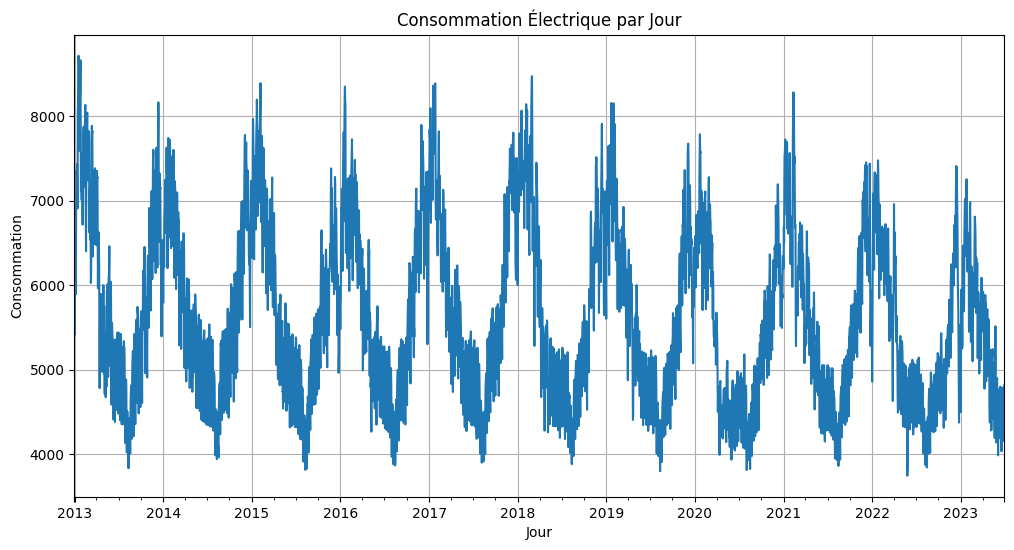

In [957]:
# Par jour
plt.figure(figsize=(12, 6))
data.resample('D')['consommation_brute_electricite_rte'].mean().plot()
plt.title('Consommation Électrique par Jour')
plt.xlabel('Jour')
plt.ylabel('Consommation')
plt.grid(True)
plt.show()

In [958]:
# Enregistre les données dans un fichier CSV
data["consommation_brute_electricite_rte"].resample("D").mean().to_csv("data/hdf_daily.csv")

## 3. Créez une moyenne mobile sur une semaine, centrée et symétrique, à partir de la série agrégée à la journée. (Posez vous la question de la différence entre le moyenne mobile et ce que l’on vient de faire).

1. c'est une méthode de lissage des données qui permet de réduire le bruit et de faire ressortir les tendances sous-jacentes. Elle est calculée sur une période de temps fixe.

2. Une moyenne mobile consiste à calculer la moyenne des valeurs d'une série sur une fenêtre glissante. Par exemple, pour une moyenne mobile sur 7 jours, vous calculez la moyenne des données sur une fenêtre de 7 jours, puis faites glisser la fenêtre d'un jour et calculez à nouveau la moyenne, et ainsi de suite. Cela a pour effet de lisser la série en atténuant les fluctuations à court terme.

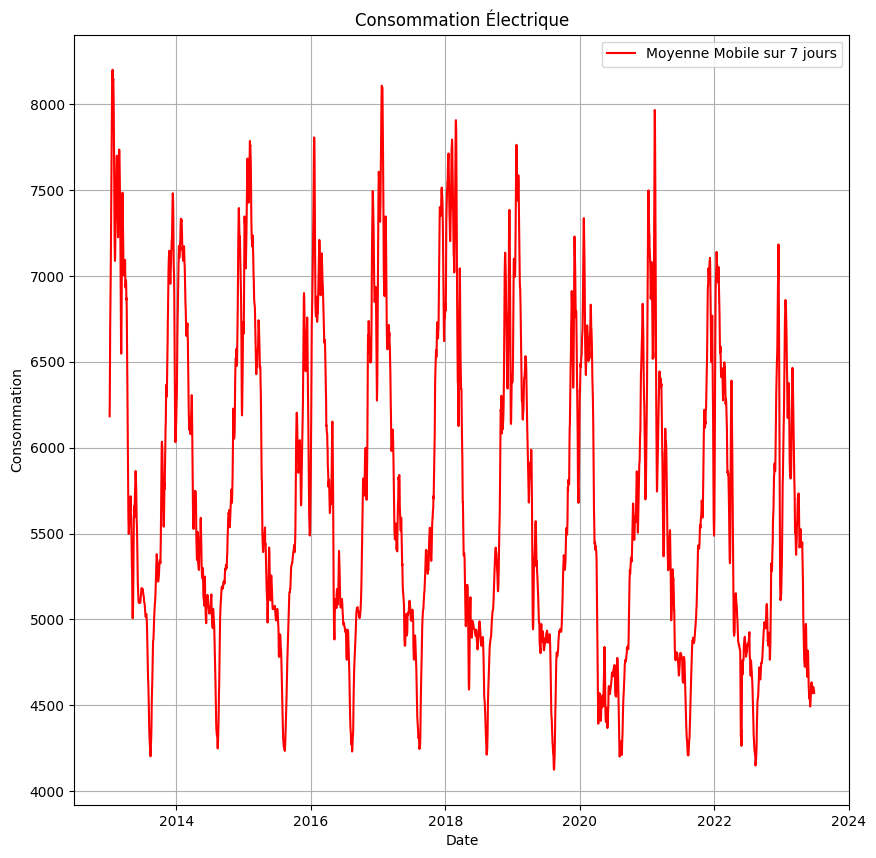

In [959]:
data_day = data["consommation_brute_electricite_rte"].resample("D").mean()
plt.plot(data_day.rolling(window=7,center=True, win_type=None).mean(), label='Moyenne Mobile sur 7 jours', color='red')
plt.title('Consommation Électrique')
plt.xlabel('Date')
plt.ylabel('Consommation')
plt.grid(True)
plt.legend()
plt.show()

## 4. Quelle est la différence entre la moyenne mobile et les agrégations précédentes?

* La moyenne mobile conserve le même nombre de points
* L'agrégation réduit le nombre de points de données en les regroupant

La moyenne mobile a deux principaux effets :
- Elle lisse la série temporelle, ce qui signifie qu'elle réduit les variations brusques et rend la tendance générale plus claire.
- Elle élimine la saisonnalité, c'est-à-dire les motifs récurrents à court terme, ce qui permet de mieux observer les tendances à plus long terme.





## 5. A l’aide de box-plot, observez la saisonnalité: 
(trimestrielle (chaque trimestre), mensuelle (chaque mois), hebdomadaire (chaque semaine),journalière (chaque jour))


In [960]:
data_day = data_day.to_frame()
data_day

,consommation_brute_electricite_rte
date_heure,
2012-12-31 00:00:00+00:00,5989.000000
2013-01-01 00:00:00+00:00,5412.687500
2013-01-02 00:00:00+00:00,6450.125000
2013-01-03 00:00:00+00:00,6668.416667
2013-01-04 00:00:00+00:00,6667.354167
...,...
2023-06-26 00:00:00+00:00,4589.083333
2023-06-27 00:00:00+00:00,4635.541667
2023-06-28 00:00:00+00:00,4759.458333


In [961]:
data_day['date'] = data_day.index

data_day['quarter'] = data_day['date'].dt.quarter        # trimestrielle
data_day['month'] = data_day['date'].dt.strftime('%B')   # mensuelle
data_day['day'] = data_day['date'].dt.strftime('%A')     # hebdomadaire
data_day['hour'] = data_day['date'].dt.strftime('%H')    # journalière

In [962]:
data_day

,consommation_brute_electricite_rte,date,quarter,month,day,hour
date_heure,,,,,,
2012-12-31 00:00:00+00:00,5989.000000,2012-12-31 00:00:00+00:00,4,December,Monday,00
2013-01-01 00:00:00+00:00,5412.687500,2013-01-01 00:00:00+00:00,1,January,Tuesday,00
2013-01-02 00:00:00+00:00,6450.125000,2013-01-02 00:00:00+00:00,1,January,Wednesday,00
2013-01-03 00:00:00+00:00,6668.416667,2013-01-03 00:00:00+00:00,1,January,Thursday,00
2013-01-04 00:00:00+00:00,6667.354167,2013-01-04 00:00:00+00:00,1,January,Friday,00
...,...,...,...,...,...,...
2023-06-26 00:00:00+00:00,4589.083333,2023-06-26 00:00:00+00:00,2,June,Monday,00
2023-06-27 00:00:00+00:00,4635.541667,2023-06-27 00:00:00+00:00,2,June,Tuesday,00
2023-06-28 00:00:00+00:00,4759.458333,2023-06-28 00:00:00+00:00,2,June,Wednesday,00


In [963]:
data['date'] = data.index
data['hour'] = data['date'].dt.hour

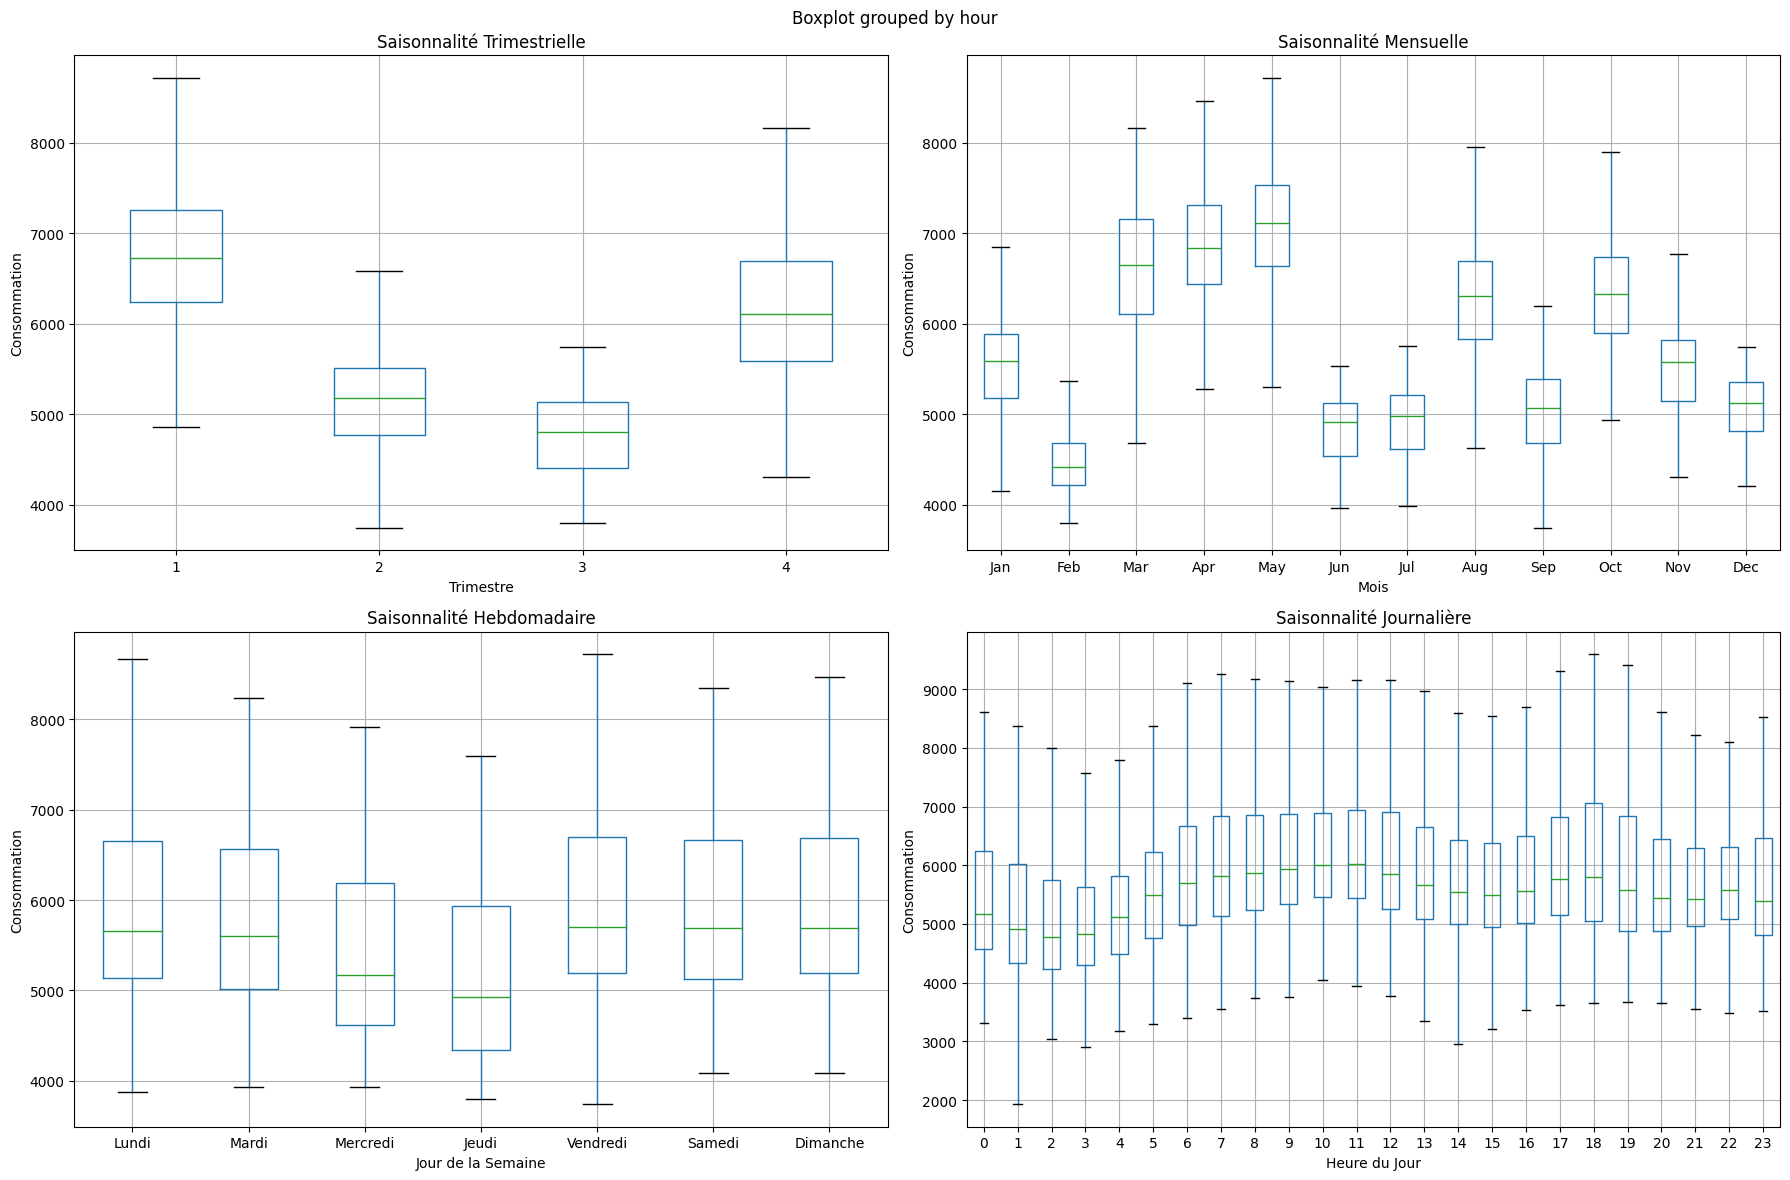

In [964]:
import calendar
import matplotlib.pyplot as plt

# Créer une figure globale avec plusieurs sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Saisonnalité Trimestrielle
data_day.boxplot(column='consommation_brute_electricite_rte', by='quarter', showfliers=False, ax=axes[0, 0])
axes[0, 0].set_title('Saisonnalité Trimestrielle')
axes[0, 0].set_xlabel('Trimestre')
axes[0, 0].set_ylabel('Consommation')

# Saisonnalité Mensuelle
data_sorted = data_day.sort_values(by='month')
month_names = [calendar.month_abbr[i] for i in range(1, 13)]
ax = data_sorted.boxplot(column='consommation_brute_electricite_rte', by='month', showfliers=False, ax=axes[0, 1])
ax.set_xticklabels(month_names)
axes[0, 1].set_title('Saisonnalité Mensuelle')
axes[0, 1].set_xlabel('Mois')
axes[0, 1].set_ylabel('Consommation')

# Saisonnalité Hebdomadaire
data_day.boxplot(column='consommation_brute_electricite_rte', by='day', showfliers=False, ax=axes[1, 0])
axes[1, 0].set_title('Saisonnalité Hebdomadaire')
axes[1, 0].set_xlabel('Jour de la Semaine')
axes[1, 0].set_ylabel('Consommation')
axes[1, 0].set_xticks(range(1, 8))
axes[1, 0].set_xticklabels(['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche'])

# Saisonnalité Journalière
data.boxplot(column='consommation_brute_electricite_rte', by='hour', showfliers=False, ax=axes[1, 1])
axes[1, 1].set_title('Saisonnalité Journalière')
axes[1, 1].set_xlabel('Heure du Jour')
axes[1, 1].set_ylabel('Consommation')
axes[1, 1].set_xticks(range(1, 25))

# Ajustez l'espacement entre les sous-graphiques pour une meilleure lisibilité
plt.tight_layout()

# Affichez la figure
plt.show()


## 6. Qu’est ce que la stationnarité? 

- La stationnarité dans les séries temporelles signifie que les propriétés statistiques de la série ne changent pas avec le temps. 

- Il existe deux types de stationnarité : stricte (toutes les propriétés statistiques restent constantes) et en moyenne (la moyenne reste constante, mais la variance peut varier). 

- La stationnarité simplifie l'analyse des séries temporelles, facilite l'application de modèles statistiques et améliore la prévisibilité. 

- Cependant, de nombreuses séries temporelles réelles ne sont pas stationnaires et peuvent nécessiter des ajustements pour devenir stationnaires avant l'analyse ou la prévision.

#### Charles
**`Processus Stationnaire`**: Un processus est (faiblement) stationnaire si son espérance et ses autocovariances sont invariantes par translation dans le temps (Stationarity is a property of a time series. A stationary series is one where the values of the series is not a function of time.) 

En français, peu importe quand on le regarde, il tourne toujours autour de la même moyenne avec des variations similaires (donc pas de saisonalité et pas de tendance)

## 7. Visuellement, pour vous la time serie est-elle stationnaire ou non stationnaire? 

La structure de la série reste la même, alors le processus est dit stationnaire. ses propriétés statistiques ne varient dans le temps.

#### Charles
Pour la tendance ce n'est pas évident, par contre très forte saisonalité donc forcément non stationnaire.

#### <font color="red"> Comment décomposer une série temporelle en ses composantes ?</font>



#  <font color="green"> Série originale saisonnalisé </font> 

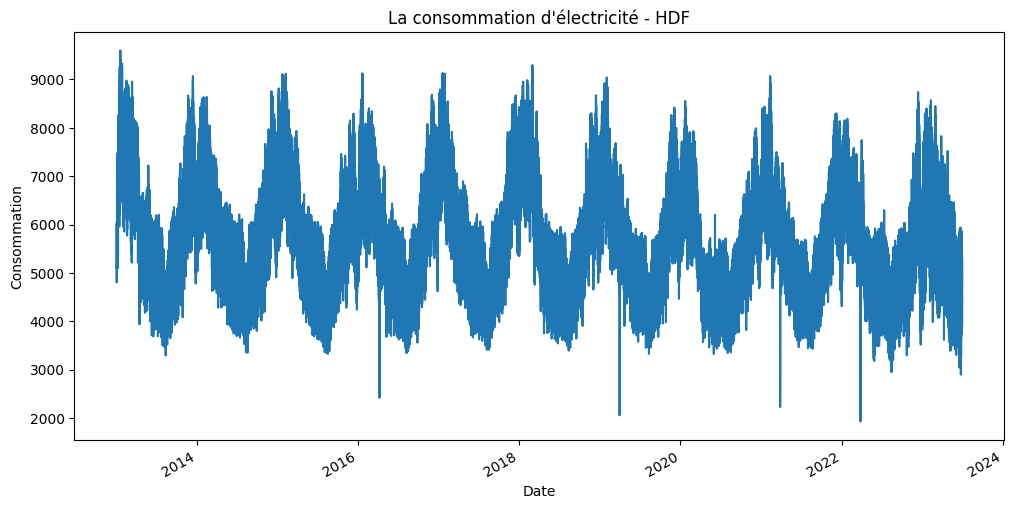

In [965]:
plt.figure(figsize=(12, 6))
data["consommation_brute_electricite_rte"].plot()
# Add a title
plt.title("La consommation d'électricité - HDF")

# Add labels for the x and y axes
plt.xlabel("Date")
plt.ylabel("Consommation")

# Display the plot
plt.show()

## 8. Réalisez un test de Dickey Fuller (est un test de stationnarité des séries temporelles): 
- quelle est l’hypothèse nulle : H0 : la série temporelle est non stationnaire (la série temporelle a une racine unitaire)
- et l’hypothèse alternative: H1: la série temporelle est stationnaire
- quelle est la statistique calculée : -4.394594222469944
- quelle distribution théorique suit elle d’après l’hypothèse nulle : la série temporelle suit une distribution qui comporte une racine unitaire, ce qui signifie qu'elle est non stationnaire.
- Quelle est la probabilité que la statistique sous l’hypothèse H0 prenne un valeur aussi extrême voir plus extrême? p-value = 0.00030344010019686316

In [966]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller


# # Agréger les données par jour en calculant la moyenne quotidienne
# data['date'] = pd.to_datetime(data.index)
# # data_daily_mean = data.groupby(data.index.day)['consommation_brute_electricite_rte'].mean()
# data_daily_mean=data.resample('D')['consommation_brute_electricite_rte'].mean()


# Réaliser le test de Dickey-Fuller
# result = adfuller(data_daily_mean, autolag='AIC')

# Où

data_day= pd.read_csv("data/hdf_daily.csv", index_col="date_heure", parse_dates = True)
data_day.index = pd.to_datetime(data_day.index, utc=True)
result = adfuller(data_day, autolag='AIC')


# Extraire les résultats
test_statistic = result[0]
p_value = result[1]
critical_values = result[4]

# Interpréter les résultats
print(f"Statistique de test : {test_statistic}")
print(f"P-value : {p_value}")
print("Valeurs critiques :")
for key, value in critical_values.items():
    print(f"    {key}: {value}")

# Comparer la p-value à un seuil de significativité (par exemple, 0.05)
if p_value <= 0.05:
    print("La série temporelle est stationnaire autour d'un trend (rejet de H0)")
else:
    print("La série temporelle n'est pas stationnaire autour d'un trend (absence de rejet de H0)")


Statistique de test : -4.236425652702576
P-value : 0.0005713466895179795
Valeurs critiques :
    1%: -3.432070672988693
    5%: -2.8623002987378547
    10%: -2.567174716967499
La série temporelle est stationnaire autour d'un trend (rejet de H0)


###  <font color="green"> Remarque: </font> 
- Les résultats du test de Dickey-Fuller indiquent que la série temporelle de la moyenne quotidienne de la consommation électrique est stationnaire. 
- La statistique de test est calculée en effectuant une régression linéaire sur la série temporelle avec un modèle qui inclut un terme de tendance. La statistique de test mesure à quel point la tendance est importante dans la série temporelle. Plus la statistique de test est négative, plus il est probable que la série soit stationnaire (c'est-à-dire qu'elle ne présente pas de tendance significative).

###  <font color="green"> KPSS Test </font> 



* le test KPSS (H0: la série est stationnaire) évalue si une série temporelle présente une stationnarité de type tendance (stationnarité autour d'une moyenne constante) plutôt qu'une stationnarité de type racine unitaire (non stationnarité due à une tendance) de celle de Dickey-Fuller (H0: la série est non stationnaire). 
* Le test de KPSS est un test statistique qui permet de tester la stationnarité d'une série temporelle. Il est basé sur le principe que si une série temporelle est stationnaire, alors sa moyenne et sa variance doivent être constantes au cours du temps.

In [967]:
from statsmodels.tsa.stattools import kpss

# Effectuez le test KPSS
result = kpss(data_day, regression='c')

# Extrayez les résultats du test
kpss_statistic = result[0]
p_value = result[1]
lags_used = result[2]
critical_values = result[3]

# Interprétez les résultats
print(f"Statistique KPSS : {kpss_statistic}")
print(f"P-value : {p_value}")
print(f"Lags utilisés : {lags_used}")
print("Valeurs critiques :")
for key, value in critical_values.items():
    print(f"    {key}: {value}")

# Comparez la p-value à un seuil de significativité (par exemple, 0.05)
if p_value <= 0.05:
    print("La série temporelle est non stationnaire autour d'un trend (rejet de H0)")
else:
    print("La série temporelle est stationnaire autour d'un trend (absence de rejet de H0)")

Statistique KPSS : 0.49341650122711717
P-value : 0.043149436660559204
Lags utilisés : 38
Valeurs critiques :
    10%: 0.347
    5%: 0.463
    2.5%: 0.574
    1%: 0.739
La série temporelle est non stationnaire autour d'un trend (rejet de H0)


* Compte tenu de ces résultats, la p-value est inférieure au seuil de 0.05, ce qui suggère que la série est non stationnaire. Cependant, la statistique KPSS n'est pas très élevée, ce qui peut indiquer une certaine proximité par rapport à la stationnarité. 
* Le test est cohérent, il est difficile de rejeter ici l'hypothèse nulle d'une stationnarité autour d'un trend.
* Remarque: Un grand nombre de lags peut indiquer une non-stationnarité.

## 10. Désaisonnalisez la composante annuelle de votre time série est utilisez à nouveau le test de Dickey Fuller. Que comprenez vous de ce résultat?

###  <font color="green"> Série désaisonnalisé </font> 

<Axes: xlabel='date_heure'>

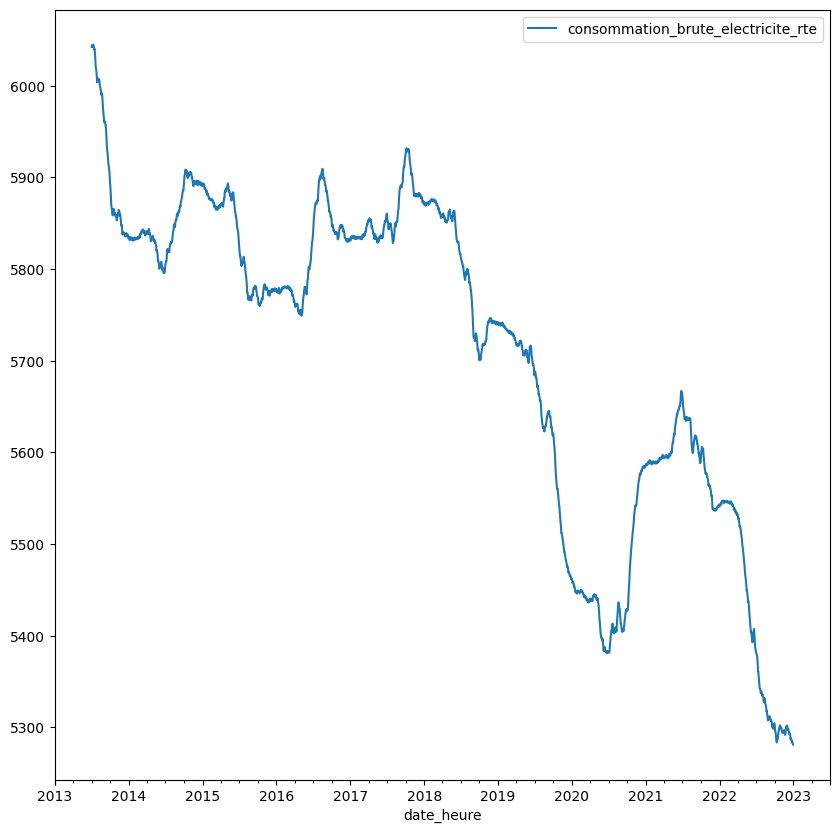

In [968]:
data_day.rolling(window=365,center=True, win_type=None).mean().plot()

* Lorsque l'on désaisonnalise une série temporelle, on élimine les variations saisonnières de la série. Cela permet de rendre la série plus stationnaire et donc de faciliter l'interprétation des résultats du test de KPSS.

* Dans le cas de la série temporelle désaisonnalisée, le test de KPSS ne rejette pas l'hypothèse de stationnarité. Cela signifie que la série temporelle est stationnaire et que sa moyenne et sa variance sont constantes au cours du temps.

* Ce résultat est important car il nous permet de conclure que la série temporelle est bien adaptée à une analyse statistique. En effet, la plupart des méthodes statistiques supposent que les données soient stationnaires.

##  Dickey Fuller.  désaisonnalisé

In [969]:
data_rolling_year = data_day.rolling(window=365,center=True, win_type=None).mean()
data_rolling_year = data_rolling_year[~data_rolling_year["consommation_brute_electricite_rte"].isna()]
data_rolling_year

,consommation_brute_electricite_rte
date_heure,
2013-07-01 00:00:00+00:00,6042.525853
2013-07-02 00:00:00+00:00,6043.187269
2013-07-03 00:00:00+00:00,6044.223342
2013-07-04 00:00:00+00:00,6043.786641
2013-07-05 00:00:00+00:00,6043.454392
...,...
2022-12-26 00:00:00+00:00,5284.278802
2022-12-27 00:00:00+00:00,5283.580115
2022-12-28 00:00:00+00:00,5282.859738


In [970]:

# data_day= pd.read_csv("data/hdf_daily.csv", index_col="date_heure", parse_dates = True)
# data_day.index = pd.to_datetime(data_day.index, utc=True)

# ADF Test
result = adfuller(data_rolling_year, autolag='AIC')


# Extraire les résultats
test_statistic = result[0]
p_value = result[1]
critical_values = result[4]

# Interpréter les résultats
print(f"Statistique de test : {test_statistic}")
print(f"P-value : {p_value}")
print("Valeurs critiques :")
for key, value in critical_values.items():
    print(f"    {key}: {value}")

# Comparer la p-value à un seuil de significativité (par exemple, 0.05)
if p_value <= 0.05:
    print("La série temporelle désaisonnalisé est stationnaire autour d'un trend (rejet de H0)")
else:
    print("La série temporelle désaisonnalisé n'est pas stationnaire autour d'un trend (absence de rejet de H0)")


Statistique de test : -0.48196974836528694
P-value : 0.8954872138995966
Valeurs critiques :
    1%: -3.4322523797568776
    5%: -2.862380562266727
    10%: -2.567217446677258
La série temporelle désaisonnalisé n'est pas stationnaire autour d'un trend (absence de rejet de H0)


## 11. Sur la time serie désaisonnalisée, réalisez à nouveau un test de KPSS. Que peut-on en conclure?

In [971]:
# Effectuez le test KPSS
result = kpss(data_rolling_year, regression='c')

# Extrayez les résultats du test
kpss_statistic = result[0]
p_value = result[1]
lags_used = result[2]
critical_values = result[3]

# Interprétez les résultats
print(f"Statistique KPSS : {kpss_statistic}")
print(f"P-value : {p_value}")
print(f"Lags utilisés : {lags_used}")
print("Valeurs critiques :")
for key, value in critical_values.items():
    print(f"    {key}: {value}")

# Comparez la p-value à un seuil de significativité (par exemple, 0.05)
if p_value <= 0.05:
    print("La série temporelle est non stationnaire autour d'un trend (rejet de H0)")
else:
    print("La série temporelle est stationnaire autour d'un trend (absence de rejet de H0)")

Statistique KPSS : 6.912274782660002
P-value : 0.01
Lags utilisés : 37
Valeurs critiques :
    10%: 0.347
    5%: 0.463
    2.5%: 0.574
    1%: 0.739
La série temporelle est non stationnaire autour d'un trend (rejet de H0)


/tmp/ipykernel_105592/4208090357.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(data_rolling_year, regression='c')


### Conclusion:
* On voit ici que les tests statistiques contre-disent notre intuition. C'est assez classique dans les séries temporelles. L'approche graphique est souvent la plus pertinente, il est évident ici qu'il existe une saisonnalité.

* Le fait de ne pas pouvoir se fier aux tests est ce qui constitue la grande difficulté des time series, il est assez difficile d'automatiser les études. Il est souvent nécessaire de revenir à une approche graphique, ce qui prend du temps.

## 12. Pour vous la série temporelle est plutôt additive ou multiplicative? 
* Les variations semblent être de même amplitude tout au long de la série, la série est probablement additive. (La composante saisonnière a une amplitude constante par rapport à la série temporelle.)
* L'amplitude des fluctuations saisonnières reste relativement constante.


### Plus d'info:

<font color="blue"> Source: https://www.machinelearningplus.com/time-series/time-series-analysis-python/</font>

#### <font color="red"> Modèles dans une série temporelle</font>
Toute série temporelle peut être divisée en les composantes suivantes : Niveau de base + Tendance + Saisonnalité + Erreur

Une tendance est observée lorsqu'une pente croissante ou décroissante est observée dans la série temporelle. En revanche, la saisonnalité est observée lorsqu'un motif distinct et répété est observé à des intervalles réguliers en raison de facteurs saisonniers. Cela peut être dû au mois de l'année, au jour du mois, aux jours de la semaine ou même à l'heure de la journée.

Cependant, il n'est pas obligatoire que toutes les séries temporelles aient une tendance et/ou une saisonnalité. Une série temporelle peut ne pas avoir de tendance distincte mais présenter une saisonnalité. L'inverse peut également être vrai.

#### <font color="red"> Séries temporelles additives et multiplicative</font>
En fonction de la nature de la tendance et de la saisonnalité, une série temporelle peut être modélisée comme une série additive ou multiplicative, où chaque observation de la série peut être exprimée soit comme une somme, soit comme un produit des composantes :

Série temporelle additive :
Valeur = Niveau de base + Tendance + Saisonnalité + Erreur

Série temporelle multiplicative :
Valeur = Niveau de base x Tendance x Saisonnalité x Erreur

#### <font color="red"> Comment décomposer une série temporelle en ses composantes ?</font>

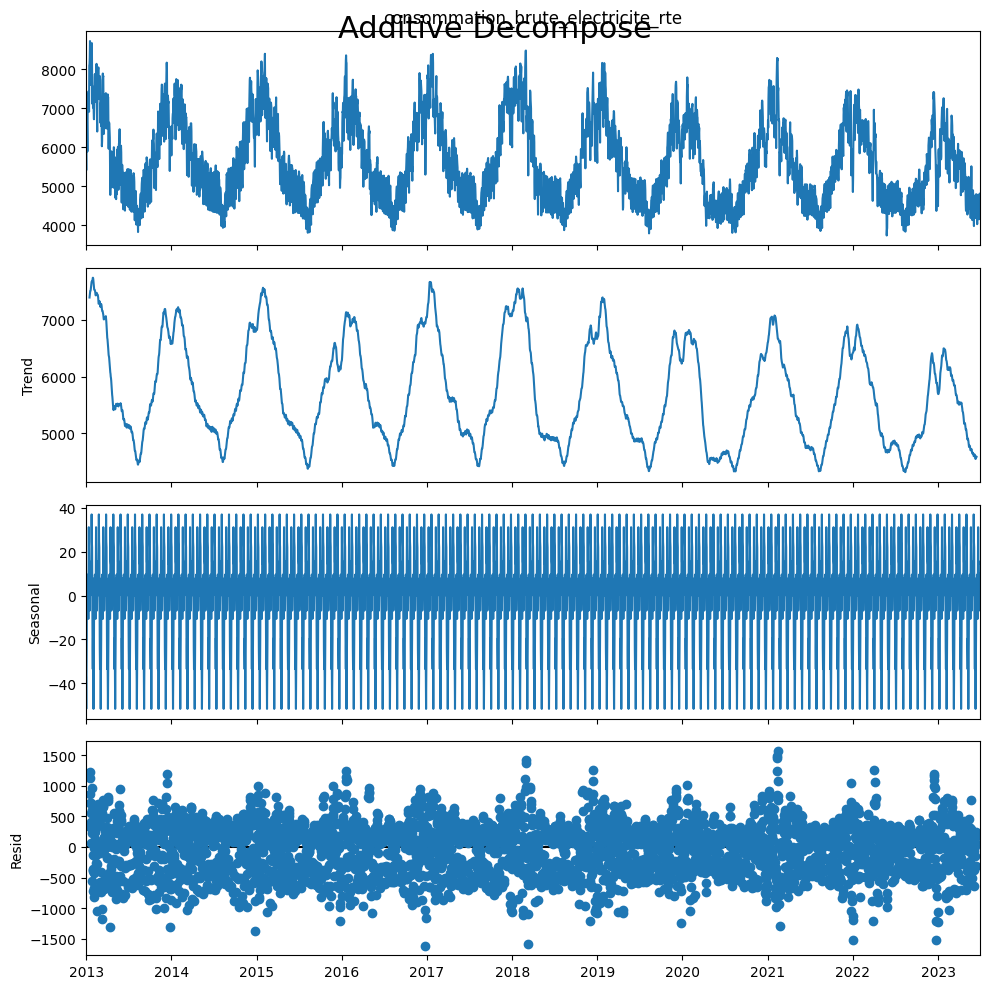

In [972]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
# Multiplicative Decomposition 
# result_mul = seasonal_decompose(data['consommation_brute_electricite_rte'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
data_day.index.freq = 'D'  # Définir la fréquence comme mensuelle
# result_add = seasonal_decompose(df['consommation_brute_electricite_rte'], model='additive', extrapolate_trend='freq')  #extrapolate_trend='freq':Gère toute valeur manquante dans la tendance et les résidus au début de la série."
result_add = seasonal_decompose(data_day['consommation_brute_electricite_rte'], model='additive', period=31)


# Plot
plt.rcParams.update({'figure.figsize': (10,10)}), 
# result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

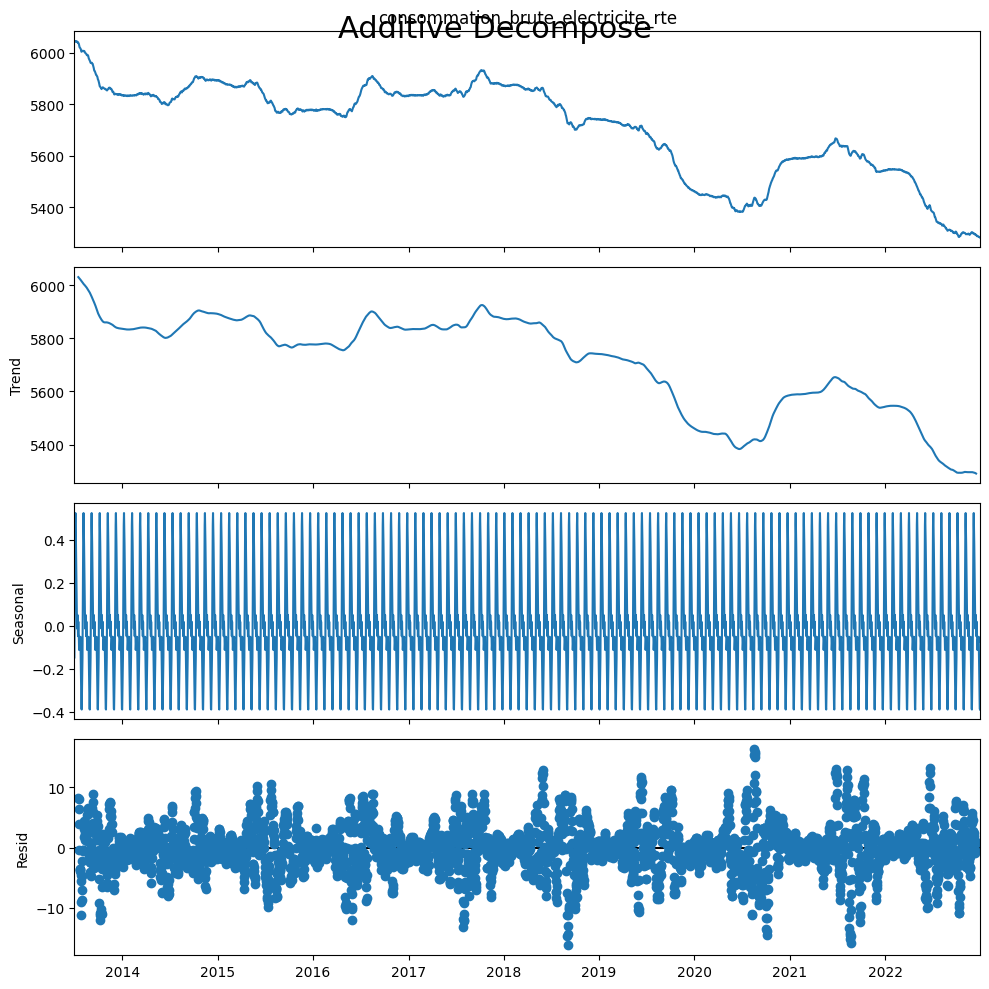

In [973]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
# Multiplicative Decomposition 
# result_mul = seasonal_decompose(data['consommation_brute_electricite_rte'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
data_day.index.freq = 'D'  # Définir la fréquence comme mensuelle
# result_add = seasonal_decompose(df['consommation_brute_electricite_rte'], model='additive', extrapolate_trend='freq')
result_add = seasonal_decompose(data_rolling_year['consommation_brute_electricite_rte'], model='additive', period=31)


# Plot
plt.rcParams.update({'figure.figsize': (10,10)}), 
# result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [974]:
# Extraire les composantes:
# La composante saisonnière est la partie de la série temporelle qui se répète sur une période régulière.
# La composante de tendance est la partie de la série temporelle qui augmente ou diminue avec le temps. 
# La composante résiduelle est la partie de la série temporelle qui n'est pas expliquée par les composantes saisonnières ou de tendance.
# Valeurs réelles = Somme de (Saisonnalité + Tendance + Résidu)
data_reconstructed = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis=1)
data_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
data_reconstructed.head()

,seas,trend,resid,actual_values
date_heure,,,,
2013-07-01 00:00:00+00:00,-0.146726,NaN,NaN,6042.525853
2013-07-02 00:00:00+00:00,0.053745,NaN,NaN,6043.187269
2013-07-03 00:00:00+00:00,0.271299,NaN,NaN,6044.223342
2013-07-04 00:00:00+00:00,0.468637,NaN,NaN,6043.786641
2013-07-05 00:00:00+00:00,0.524669,NaN,NaN,6043.454392


## Série originale

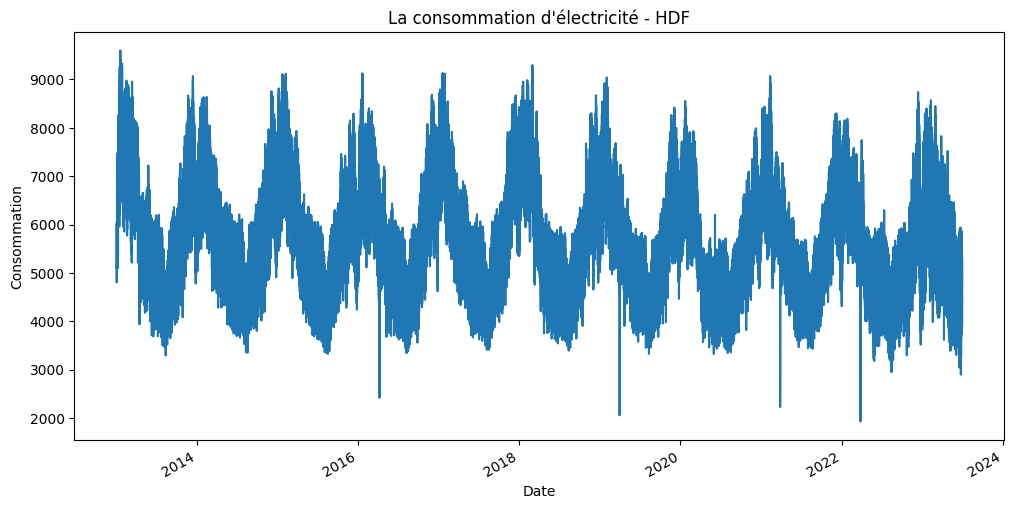

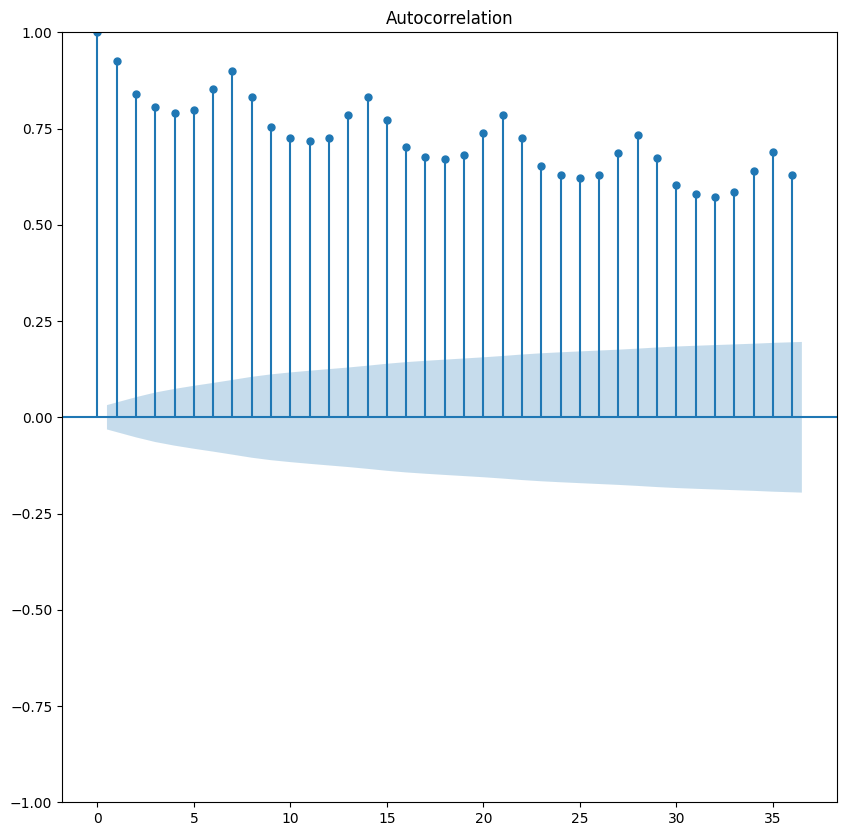

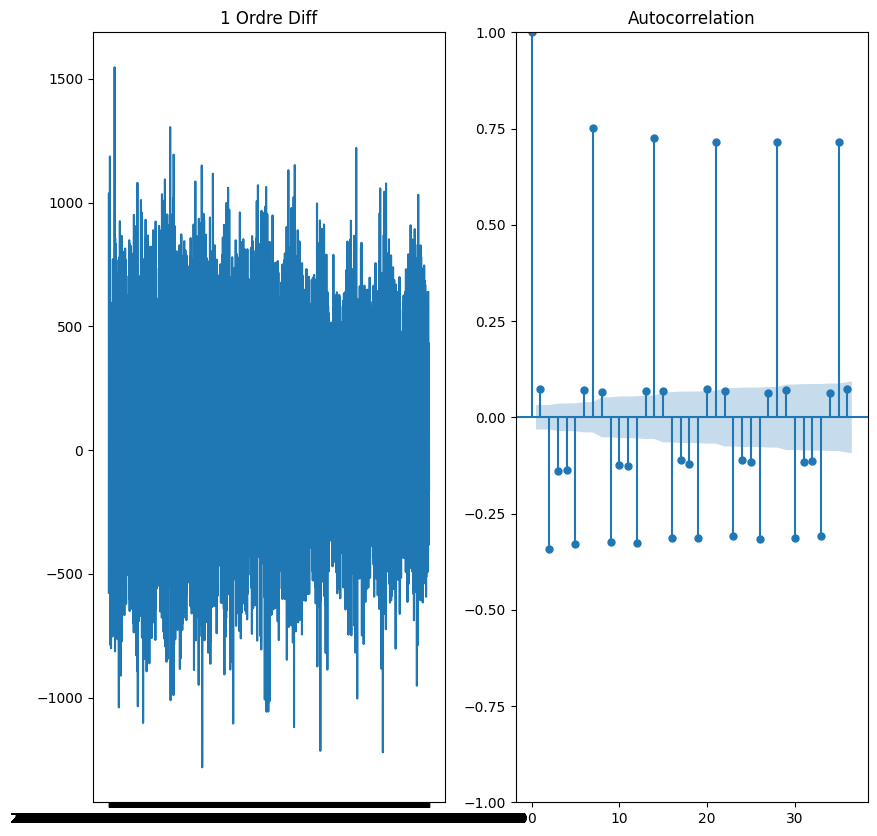

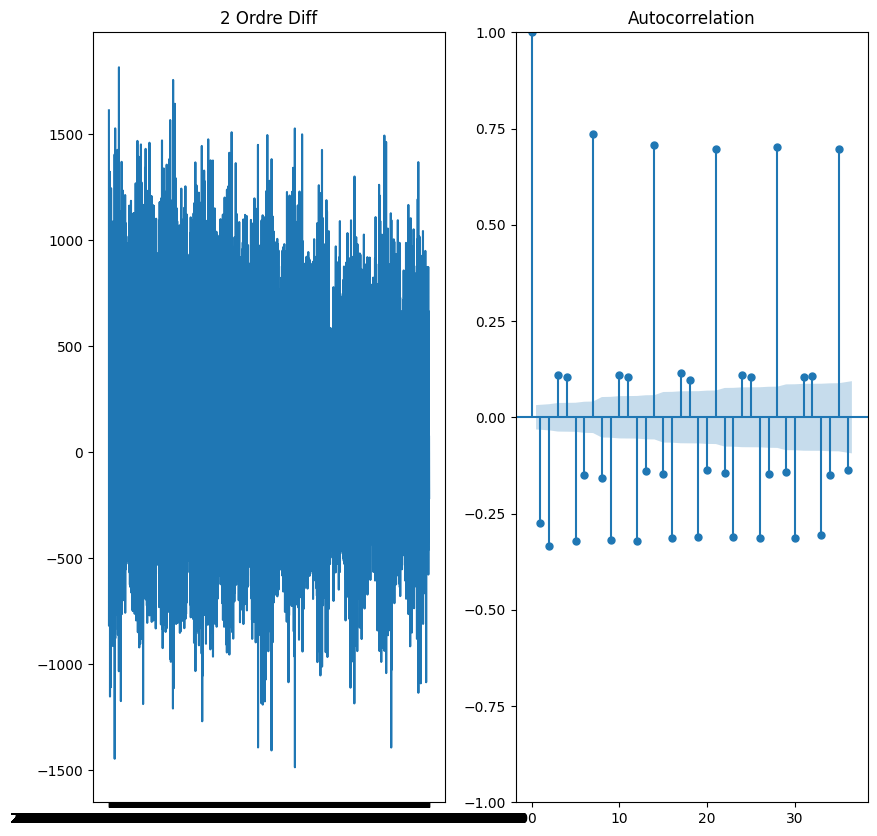

In [994]:
plt.figure(figsize=(12, 6))
data["consommation_brute_electricite_rte"].plot()
# Add a title
plt.title("La consommation d'électricité - HDF")

# Add labels for the x and y axes
plt.xlabel("Date")
plt.ylabel("Consommation")

# Display the plot
plt.show()

# # Perform first differencing
# data_diff = data_rolling_year['consommation_brute_electricite_rte'].diff()

# # Plot the differenced data
# plt.figure(figsize=(12, 6))
# plt.plot(data_diff)
# plt.title("First Difference of Electricity Consumption - HDF")
# plt.xlabel("Date")
# plt.ylabel("Differenced Consumption")
# plt.show()




# #  Perform second differencing
# data_diff2 = data_diff.diff()


# # Plot the differenced data
# plt.figure(figsize=(12, 6))
# plt.plot(data_diff2)
# plt.title("First Difference of Electricity Consumption - HDF")
# plt.xlabel("Date")
# plt.ylabel("Differenced Consumption")
# plt.show()

import sys
import pandas as pd
from numpy import array


df = pd.read_csv("data/hdf_daily.csv", names=['value'], header=0)

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.value)

#1rst order differencing
f = plt.figure()
ax1=f.add_subplot(121)
ax1.set_title('1 Ordre Diff')
ax1.plot(df.value.diff())


ax2=f.add_subplot(122)
plot_acf(df.value.diff().dropna() , ax= ax2)
#plt.show()

#2nd order differencing to enhance the stationary nature.
f = plt.figure()
ax1=f.add_subplot(121)
ax1.set_title('2 Ordre Diff')
ax1.plot(df.value.diff().diff())

ax2=f.add_subplot(122)
plot_acf(df.value.diff().diff().dropna() , ax= ax2)
plt.show()
